In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
customers = pd.read_csv('Mall_Customers.csv')

In [3]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [15]:
customers.drop('CustomerID',axis=1)

,Gender,Age,Annual Income,Spending Score,label
0,Male,19,15,39,3
1,Male,21,15,81,0
2,Female,20,16,6,3
3,Female,23,16,77,0
4,Female,31,17,40,3
...,...,...,...,...,...
195,Female,35,120,79,1
196,Female,45,126,28,4
197,Male,32,126,74,1
198,Male,32,137,18,4


In [7]:
customers.rename(columns = {'Annual Income (k$)' : 'Annual Income','Spending Score (1-100)' : 'Spending Score'}, inplace = True)

C:\Users\patil\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Gender', ylabel='count'>

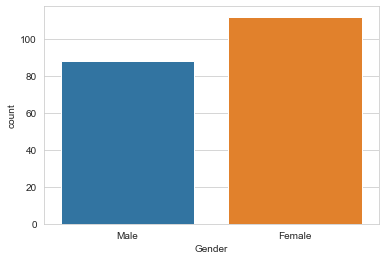

In [8]:
sns.set_style('whitegrid')
sns.countplot(customers['Gender'])

C:\Users\patil\anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

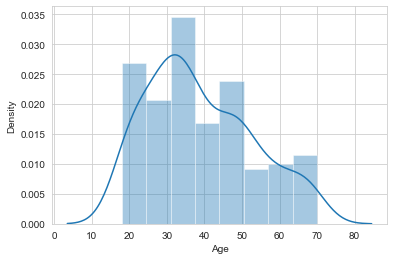

In [9]:
sns.distplot(customers['Age'])

C:\Users\patil\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Annual Income', ylabel='Spending Score'>

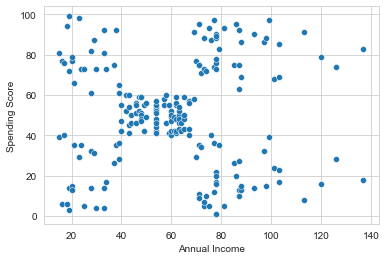

In [10]:
sns.scatterplot(customers['Annual Income'],customers['Spending Score'])

In [11]:
from sklearn.cluster import KMeans

In [12]:
cluster = customers.iloc[:,[3,4]].values

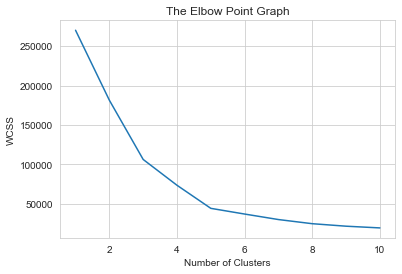

In [13]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(cluster)
    wcss.append(kmeans.inertia_)
fig = plt.figure()
ax = fig.add_subplot(111, xlabel="Number of Clusters", ylabel="WCSS")
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')

plt.show()

In [16]:
#Taking 5 clusters
km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(cluster)
#predicting the labels of the input data
y=km1.predict(cluster)
#adding the labels to a column named label
customers["label"] = y
#The new dataframe with the clustering done
customers.head()

,CustomerID,Gender,Age,Annual Income,Spending Score,label
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


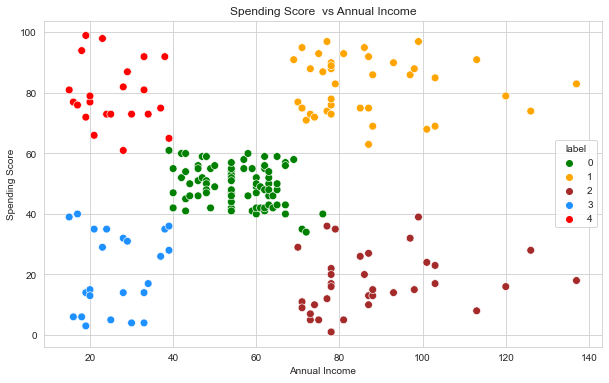

In [17]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income',y = 'Spending Score',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = customers  ,s = 60 )
plt.xlabel('Annual Income')
plt.ylabel('Spending Score') 
plt.title('Spending Score  vs Annual Income')
plt.show()

In above picture we can clearly see that 5 different clusters have been formed from the data.